*Created by Petteri Nevavuori.*

---

# Deep Learning seminaari

Kirjana Goodfellow et al.: Deep Learning (2016)

Otsikot seuraavat pääotsikoiden tasolla kirjaa, mutta alaotsikot eivät aina.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#10.-Sequence-Modeling:-Recurrent-and-Recursive-Nets" data-toc-modified-id="10.-Sequence-Modeling:-Recurrent-and-Recursive-Nets-1">10. Sequence Modeling: Recurrent and Recursive Nets</a></span><ul class="toc-item"><li><span><a href="#10.1-Unfolding-Computational-Graphs" data-toc-modified-id="10.1-Unfolding-Computational-Graphs-1.1">10.1 Unfolding Computational Graphs</a></span></li><li><span><a href="#10.2-Recurrent-Neural-Networks" data-toc-modified-id="10.2-Recurrent-Neural-Networks-1.2">10.2 Recurrent Neural Networks</a></span><ul class="toc-item"><li><span><a href="#Teacher-Forcing-and-Networks-with-Output-Recurrence" data-toc-modified-id="Teacher-Forcing-and-Networks-with-Output-Recurrence-1.2.1">Teacher Forcing and Networks with Output Recurrence</a></span></li><li><span><a href="#Computing-the-Gradient" data-toc-modified-id="Computing-the-Gradient-1.2.2">Computing the Gradient</a></span></li><li><span><a href="#Recurrent-Neural-Networks-as-Directed-Graphical-Models" data-toc-modified-id="Recurrent-Neural-Networks-as-Directed-Graphical-Models-1.2.3">Recurrent Neural Networks as Directed Graphical Models</a></span></li><li><span><a href="#Modeling-Sequences-Conditioned-on-Context-with-RNNs" data-toc-modified-id="Modeling-Sequences-Conditioned-on-Context-with-RNNs-1.2.4">Modeling Sequences Conditioned on Context with RNNs</a></span></li></ul></li><li><span><a href="#10.3-Bidirectional-RNNs" data-toc-modified-id="10.3-Bidirectional-RNNs-1.3">10.3 Bidirectional RNNs</a></span></li><li><span><a href="#10.4-Encoder-Decoder-Sequence-to-Sequence-Architectures" data-toc-modified-id="10.4-Encoder-Decoder-Sequence-to-Sequence-Architectures-1.4">10.4 Encoder-Decoder Sequence-to-Sequence Architectures</a></span></li><li><span><a href="#10.5-Deep-Recurrent-Networks" data-toc-modified-id="10.5-Deep-Recurrent-Networks-1.5">10.5 Deep Recurrent Networks</a></span></li><li><span><a href="#10.6-Recursive-Neural-Networks" data-toc-modified-id="10.6-Recursive-Neural-Networks-1.6">10.6 Recursive Neural Networks</a></span></li><li><span><a href="#10.7-The-Challenge-of-Long-Term-Dependencies" data-toc-modified-id="10.7-The-Challenge-of-Long-Term-Dependencies-1.7">10.7 The Challenge of Long-Term Dependencies</a></span></li><li><span><a href="#10.8-Echo-State-Networks" data-toc-modified-id="10.8-Echo-State-Networks-1.8">10.8 Echo State Networks</a></span></li><li><span><a href="#10.9-Leaky-Units-and-Other-Strategies-for-Multiple-Time-Scales" data-toc-modified-id="10.9-Leaky-Units-and-Other-Strategies-for-Multiple-Time-Scales-1.9">10.9 Leaky Units and Other Strategies for Multiple Time Scales</a></span><ul class="toc-item"><li><span><a href="#Adding-Skip-Connections-through-Time" data-toc-modified-id="Adding-Skip-Connections-through-Time-1.9.1">Adding Skip Connections through Time</a></span></li><li><span><a href="#Leaky-Units-and-a-Spectrum-of-Different-Time-Scales" data-toc-modified-id="Leaky-Units-and-a-Spectrum-of-Different-Time-Scales-1.9.2">Leaky Units and a Spectrum of Different Time Scales</a></span></li><li><span><a href="#Removing-Connections" data-toc-modified-id="Removing-Connections-1.9.3">Removing Connections</a></span></li></ul></li><li><span><a href="#10.10-The-Long-Short-Term-Memory-and-Other-Gated-RNNs" data-toc-modified-id="10.10-The-Long-Short-Term-Memory-and-Other-Gated-RNNs-1.10">10.10 The Long Short-Term Memory and Other Gated RNNs</a></span><ul class="toc-item"><li><span><a href="#LSTM" data-toc-modified-id="LSTM-1.10.1">LSTM</a></span></li><li><span><a href="#Other-Gated-RNNs" data-toc-modified-id="Other-Gated-RNNs-1.10.2">Other Gated RNNs</a></span></li></ul></li><li><span><a href="#10.11-Optimization-for-Long-Term-Dependencies" data-toc-modified-id="10.11-Optimization-for-Long-Term-Dependencies-1.11">10.11 Optimization for Long-Term Dependencies</a></span><ul class="toc-item"><li><span><a href="#Clipping-Gradients" data-toc-modified-id="Clipping-Gradients-1.11.1">Clipping Gradients</a></span></li><li><span><a href="#Regularizing-to-Encourage-Information-Flow" data-toc-modified-id="Regularizing-to-Encourage-Information-Flow-1.11.2">Regularizing to Encourage Information Flow</a></span></li></ul></li><li><span><a href="#10.12-Explicit-Memory" data-toc-modified-id="10.12-Explicit-Memory-1.12">10.12 Explicit Memory</a></span></li></ul></li></ul></div>

## 10. Sequence Modeling: Recurrent and Recursive Nets

Toistavat (*recurrent*) ja rekursiiviset (*recursive*) neuroverkot ovat peräkkäisen (*sequential*) datan käsittelyyn erikoistuneita verkkoja samaan tapaan kuin konvoluutioverkot ovat pintamaisen datan käsittelyyn erikoistuneita. Rekursiiviset verkot kykenevät konvoluutioverkkojen tapaan käsittelemään myös vaihtelevan pituisia datasekvenssejä. Kirja tekee luvussa 10.6 eron toistuvan (*recurrent*) ja rekursiivisen verkon välillä.

Toistavat verkot nojaavat jo aiemmissa luvuissa esiteltyyn perusajatukseen parametrien jaosta mallin sisäkerroksissa. Tämä mahdollistaa dimensioiltaan ja sekvenssien pituudelta vaihtelevien syötteiden käsittelyn. Kuten konvoluutioverkkojen piirteiden kanssa, voidaan toistavien verkkojen avulla löytää samoja piirteitä eri kohdista syötteitä. Ilman parametrien jakamista tulisi jokaiselle sekvenssin osalle olla omat yksilölliset yhteytensä piilokerroksiin, jolloin mallin koulutus muuttuviin sekvensseihin ja niistä etsittäviin piirteisiin olisi mahdotonta.

Toistavien verkkojen tapauksessa parametrien jakaminen eroaa konvoluutioverkoista. Piilokerrosten lisäksi myös ulostulokerros kytketään takaisin piilokerrokseen, jolloin edelliset ulostulot ovat mukana aina uuden ulostulon laskennassa. Tästä juontaa myös verkkojen toistava tai rekursiivinen luonne, sillä ulostulot ovat aina edellisten ulostulojen tuotoksia. 

Syötteiden osalta toistavat verkot kykenevät ottamaan yksiulotteisten syötteiden sarjojen lisäksi myös kaksiulotteisten syötteiden, kuten kuvien, sarjoja. Tärkeintä on, että verkon syöte on aina ajassa etenevä sarja yhtenevällä aika-askeleella.

### 10.1 Unfolding Computational Graphs

Kyseisten verkkojen laskentaa voidaan jälleen lähestyä laskentagraafin (*computational graph*) kautta, joka perinteisten verkkojen sijasta on luonteeltaan rekursiivinen. Tämän aliluvun tavoitteena onkin avata (*unfold*) toistavien verkkojen rekursiiviset laskennat helpommin avautuvaksi graafiksi, jossa syötteistä ja parametreista lasketaan ulostulot ja virheet.

Kirja käyttää rekursion esimerkkinä funktiota

$$s^{(t)}=f(s^{(t-1)};\theta),$$

jossa jokaisen tilan (*state*) $s^{(t)}$ laskenta edellyttää edellisten tilan $s^{(t-1)}$ laskentaa. Näin ollen kolmannen tilan laskenta edellyttää kahden edellisen tilan laskentaa, jolloin rekursiivinen funktio on avattavissa seuraavaan muotoon:

$$s^{(3)}=f(s^{(2)};\theta)=f(f(s^{(1)};\theta);\theta).$$

Käytännössä toistavien verkkojen kanssa on vielä tavallista, että mallin tilan $s$ lisäksi mallille annetaan jokin laskentahetkeen vaikuuttava syöte $x$. Tavallista on myös, tila pitää sisällään myös mallin antaman ulostulon. Tässä kohdin kirja siirtyy käyttämään tilasta erikseen muuttujaa $h$ alleviivaamaan rekursion tapahtumista piilokerroksissa. Tällöin avaamaton rekursiivinen funktio on muotoa

$$ h^{(t)}=f(h^{(t-1)},x^{(t)};\theta). $$

Toistavat verkot oppivat siis mallintamaan tilaa $s^{(t)}$ edellisten tilojen ja syötteiden yhdistelmänä. Koska sekä sekä syötteiden että aika-askelten eli sekvenssien määrät voivat vaihdella, on mallinnus aina jossain määrin häviöllistä. Tämä johtuu osaltaan samasta syystä kuin konvoluutioverkoissakin: jokainen pikseli ei ole merkityksekäs luokittelussa, eikä välttämättä jokainen syötteen tai sekvenssin osakaan. Tämä aiheuttaa haasteita, mikäli tavoitteena tehdä toiminnaltaan rekursiivinen autoenkooderi, sillä alkuperäisen syötteen rekonstruointi on häviöiden takia hankalaa.

Kirja pyrkii esittämään toistavat verkot etenkin niiden piilokerrosten kytkentöjen kautta. Alla on kuvattuna sekä avaamaton että avattu esitys syötteen huomioivasta rekursiivisesta laskentagraafista:

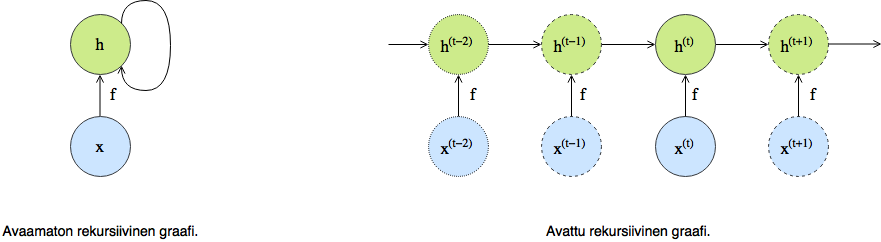

Esitystavat ovat myös itse verkkojen kohdalla samankaltaisia kummassakin tapauksessa, joskin $s$ korvataan tällöin piilokerroksella $h$ ja sen jälkeen lisätään vielä ainakin ulostulokerros. Kuten avatusta graafista voi huomata, sekvenssin pituus määrittää peräkkäisten laskentaoperaatioiden määrän. Esitystapaa vaihdellen voidaan laskentagraafin syötteiden $x$ sarjat esittää myös kootusti, mutta pääidea pysyy: syötteen pituus ei vaihdu, vain sisältö aika-askeleen mukaisesti. Samoin syötteeseen käytetty funktio $f$ pysyy samana.

### 10.2 Recurrent Neural Networks

Hyödyntäen esitettyjä toistavien laskentagraafien ideaa voidaan toistavien neuroverkkojen suunnittelua lähestyä useammasta suunnasta. Etenkin suunnittelun vapaus koskee kerrosten topologiaa: mitkä osat verkosta osallistuvat rekursioon ja mitkä taas eivät.

Kuvan puhuessa helposti enemmän hyödynnetään tässä kohdin Andrej Karpathyn blogitekstiä [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Tekstimuotoisen käsittelyn lisäksi tekstistä löytyy hyvä kuva eri verkkojen suunnittelutavoista:

![RNN connections](http://karpathy.github.io/assets/rnn/diags.jpeg)

Esimerkkiongelmia, joita näillä suunnittelutavoilla voidaan ratkaista, voivat olla vasemmalta alkaen mm. seuraavat: luokittelu, kuvatekstin tuottaminen, tekstin tunneanalyysi, konekäännös ja videon luokittelu kuva kuvalta.

Kirja onneksi kuitenkin laajentaa edellistä kuvaa tuoden esimerkkejä myös kerrosten välillä vaihtelevista rekursiivisista yhteyksistä. Rekursiivisia yhteyksiä voidaan piilokerrosten lisäksi tehdä esimerkiksi myös vain ulostulokerroksesta seuraavaan piilokerrokseen. Mallinnettava ongelma määrittää joka tapauksessa sekä verkon topologian, kerrosten väliset yhteydet ja käytetyt muut komponentit (aktivointi, regularisointi, ...).

Toistavan verkon opettaminen etenee aina sekvenssin ensimmäisestä havainnosta ja mallin alkutilasta kohti sekvenssin loppua. Otetaan esimerkiksi jokaisella askeleella ulostulon antava avatuu toistava verkko:

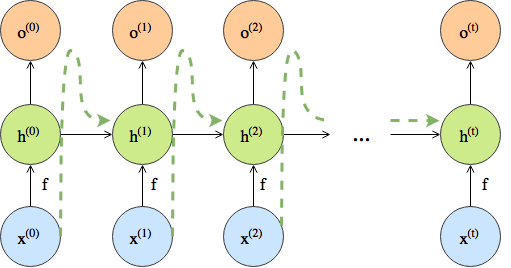

Kun mallin ulostulojen laskenta aloitetaan syötteestä $x^{(0)}$ ja tilasta $h^{(0)}$ ja edetään tila kerrallaan eteenpäin, pitävät seuraavat tilat sisällään aina tiedon myös edeltävistä tiloista. Uutta tilaa laskiessa riittää siis vain yhden edellisen tilan laskenta. 

Nämä välitilat on pidettävä tallessa, sillä mallin parametreja koulutettaessa edetään verkkoa viimeisestä tilasta alkaen aina ensimmäiseen asti. Tätä kutsutaan ajan läpi tehtäväksi *bakpropiksi* (*back-propagation through time, BPTT*). Koska tähän asti esitellyt rekursiiviset verkot ovat jyrkän kausaalisia, eli edelliset tilat vaikuttavat aina seuraaviin, on niiden koulutus sekä laskennan että muistin resurssivaatimusten kanssa lineaarisessa suhteessa sekvenssin pituuteen.

#### Teacher Forcing and Networks with Output Recurrence

Sellaiset verkot, joissa rekursiivinen yhteys on vain edellisen askeleen ulostulon $o^{(t-1)}$ ja tilan $h^{(t)}$ välillä, ovat väistämättä vähintään tilasta $h^{(t-1)}$ tilaan $h^{(t)}$ yhteyden omaavia verkkoja heikompia. Toimiakseen verkon on kyettävä tuottamaan kustakin sekvenssin osasta sellainen ulostulo, joka pitää sisällään kaiken ennustamiseen vaadittavan informaation seuraaville aika-askelille.

Tällaisten verkkojen kohdalla voidaan koulutus kuitenkin pilkkoa mielekkäästi erillisesti koulutettaviin osiin. Tämä on suoraa seurausta siitä, että ulostuloyksiköt oppivat ensisijaisesti tuottamaan kohdearvoja vastaavia tuloksia. Siispä ulostulojen ideaaliarvot ovat kohdearvoja. 

Tällöin ulostulosta piilokerrokseen kytketyn rekursiivisen verkon koulutuksen edellisen aika-askeleen tilatietona voidaan käyttää suoraan edellisen askeleen kohdearvoa $y^{(t-1)}$, eikä niinkään verkon edellistä ulostuloa $\hat{y}^{(t-1)}$. Näin tapahtuvaa koulutusta kutsutaan pakotetuksi opettamiseksi (*teacher forcing*).

Pakotetulla oppimisella voidaan välttää myös ajan läpi tehtävää *backpropia* helpottaen verkon koulutusta. Mikäli jossain vaiheessa piilokerroksen syöte kuitenkin muuttuisi edes jonkinlaiseksi edellisten aika-askelten funktioksi, on gradientteja siirryttää laskemaan myös ajan suhteen.

Mikäli verkkoon aletaankin syöttämään koulutuksen aikaisten kohdearvojen $Y$ (*teacher forcing*) sijasta koulutetun verkon ulostuloja $\hat{Y}$ (*free-running, open-loop*), voi verkon käyttö muodostua ongelmalliseksi. Arvot voivat erota toisistaan merkittävästi niiden tuottojakauman osalta, sillä malli ei välttämättä ole oppinut kohdearvojen jakaumaa. 

Tällöin jo koulutusta voidaan tehdä käyttämällä sekä verkon ulostuloja että kohdearvoja seuraavan aika-askeleen syötteinä joko yhdessä tai erikseen jollain valintatodennäköisyydellä.

#### Computing the Gradient

Gradienttien laskenta ei eroa perinteisistä neuroverkoista mitenkään muutoin, kuin että ne lasketaan avatulle toistavalle verkolle eli jokaiselle aika-askeleelle kuin omille piilokerroksilleen. Tällöin myös mitkä tahansa perinteisten verkkojen kanssa käytettävät optimointimenetelmät kelpaavat. Ainut ero tulee ajasta, jonka läpi gradientit lasketaan (*BPTT*).

Gradienttien laskenta etenee karkeasti ylätasolla seuraavasti:

1. Laske hetken virhe $L^{(t)}$
2. Laske avatun verkon yksiköiden gradientit $G^{(t)}$ suhteessa virheeseen $L^{(t)}$
3. Siirry aika-askel taaksepäin askeleeseen $t = t-1$
4. Laske avatun verkon yksiköiden gradientit $G^{(t)}$ suhteessa gradientteihin $G^{(t+1)}$
5. Toista 3-4 kunnes $t=1$ ja verkon jokaiselle yksikölle on laskettu gradientti.



#### Recurrent Neural Networks as Directed Graphical Models

Ylipäätään toistavien verkkojen tavoitteena on oppia datantuottoprosessi tai -jakauma. Mikäli se esitetään todennäköisyytenä, on kyseessä esimerkiksi vain syötesekvenssien todennäköisyyden $p(y^{(t)} \mid x^{(1)}, x^{(2)}, ... , x^{(t)})$ oppiminen. Yhtälailla ehdollisessa todennäköisyydessä voi olla myös menneet ulostulot $y^{(1)}, ... , y^{(t-1)}$.

Tällöin toistava verkko voidaan esittää muuttujien riippuvuuksien graafina:

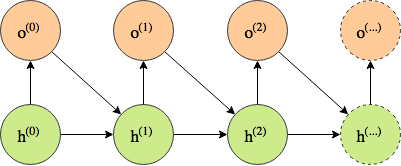

Jälleen kerran tämä on yksi toistavan verkon esitystavoista muiden joukossa, jonka tavoitteena auttaa näkemään etenkin rekursion helppous parametrien jakamisen näkökulmasta. Koska jokainen peräkkäisistä vaiheista on samankaltainen tilan ja ulostulon elämisestä huolimatta, on parametrien määrä verkossa pieni.

Pienempi parametrimäärä kuitenkin valitettavasti tarkoittaa, että niiden optimointi menneisyyttä huomioivaksi on hankalampaa. Toistavien verkkojen pohja-ajatuksena on, että samoja parametreja ensinnäkin voidaan hyödyntää eri sekvenssin vaiheissa. Samoin syötteen ja kohteen ehdollinen todennäköisyys oletetaan muuttumattomaksi, eli kautta linjan samaksi. 

Käytännössä tämä voi tarkoittaa esimerkiksi sitä, että peräkkäiset havainnot oletetaan saman ajallisen etäisyyden omaaviksi.

Piilo- ja ulostulokerrosten linkittymisen lisäksi myös sekvenssin muodostaminen on merkittävä osa toistavien verkkojen toimintaa. Koska sekvenssin pituus voi vaihdella, on tärkeää myös kyetä rajaamaan sekvenssin pituutta mielekkäästi. Kirjassa esitellään kolme tapaa:

*Sekvenssin loppumista ilmaisevan symbolin käyttö.* Esimerkiksi lauseita käsitellessä sopivaa erikoismerkkiä voidaan käyttää ilmaisemaan sekvenssin päättymistä.

*Sekvenssin kasvatusparametrin ennustaminen.* Malli voidaan kouluttaa myös itse määrittämään sen, lisätäänkö sekvenssiin vielä pituutta vai onko riittävän pitkä.

*Sekvenssin pituuden ennustaminen.* Myös itse sekvenssin pituus voidaan koittaa ennustaa.

#### Modeling Sequences Conditioned on Context with RNNs

Yksittäisten sekvenssin arvojen lisäksi toistavat verkot voivat ottaa aika-askelkohtaisena syötteenä myös vektoreita. Vektori voi olla joko sama läpi koko sekvenssin, jolloin sitä painotetaan eri aika-akseleille eri tavoin. Toisaalta jokaiselle aika-askeleelle voi yhtälailla olla myös oma vektorinsa. Näin syötteet eivät rajoitu vain selkeisiin lukuihin, vaan ne voivat olla yhtälailla jopa kuviakin.

### 10.3 Bidirectional RNNs

Yksisuuntaiset, eli menneistä havainnoista kohti tulevaisuutta etenevät rekursiiviset yhteydet ovat luonteeltaan kausaalisia. Esimerkiksi puheentunnistuksessa on kuitenkin tarpeen tietää jotain myös havaintoja seuraavista havainnoista, sillä sekä äänteet että sanat saavat merkityksensä kontekstistaan. Tällöin tarvitaan rekursiivisia yhteyksiä, jotka kykenevät huomioimaan syötesekvenssit kokonaan alusta loppuun sekä lopusta alkuun. Nämä verkot ovat kaksisuuntaisia (*bidirectional*).

Tällöin verkko muodostetaan kahdesta toistavasta neuroverkosta, joista toinen kulkee sekvenssiä alusta loppuun ja toinen taas lopusta alkuun. Yksiulotteisen eli rividatan tapauksessa verkko voisi olla vaikka tällainen:

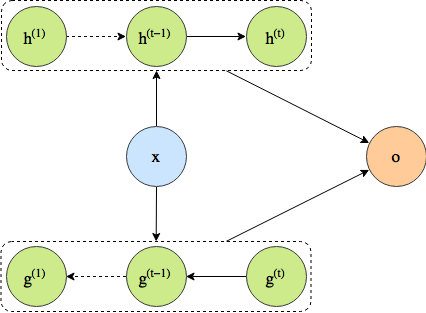

Piilokerroksen $h$ kytketään syötteeseen $x$ sekvenssin mukaisesti, kun taas $g$:n kytkennät ovat syötteeseen nähden käänteisessä järjestyksessä. Näin $h$ mallintaa sekvenssiä alusta loppuun, kun taas $g$ lopusta alkuun. Useampiulotteisen datan, kuten vaikka kuvien, kanssa olisi käytettävä jokaisen ulottuvuuden kohdalla kahta verkkoa ees-taas-oppimisen takaamiseksi.

### 10.4 Encoder-Decoder Sequence-to-Sequence Architectures

Sen lisäksi, että toistavat neuroverkot kykenevät käyttämään vaihtelevan pituisia syötesekvenssejä, ne pystyvät myös tuottamaan sellaisia. Tällöin ollaan tekemisissä enkooderi-dekooderi-tyyppisen toistavan neuroverkon kanssa, joka muuntaa syötesekvenssin joksikin ulostulosekvenssiksi. Kyseessä on tällöin moni-moneen-arkkitehtuuri, ja käytännön käyttökohteita ovat mm. puheentunnistus ja tekstin konekäännös.

Enkooderi-dekooderi-arkkitehtuuri, joka toimii myös muiden verkkojen kanssa, on kuvattuna alla. 

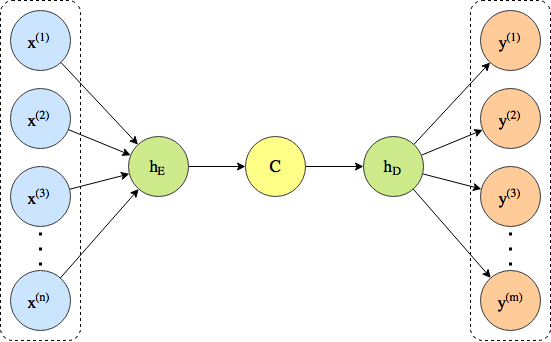

Normaalisti kyse on kahdesta toiminnallisesti keskenään peilikuvan tavoin toimivasta verkosta, jotka yhdistetään esimerkiksi yhdellä suorakytketyllä piilokerroksella $C$. Tällöin verkko pyrkii ennenkaikkea oppimaan sen, miten kääntää syöte $x$ ulostuloksi $y$ oppimalla ensin koodaamaan syötteen enkooderikerroksen $h_E$ avulla ja sitten avaamaan koodauksen dekooderivkerroksella $h_D$ tavoitelluksi ulostuloksi.

### 10.5 Deep Recurrent Networks

Tähän asti esitellyillä toistavilla verkoilla on ollut käytännössä kolme kerrosta kytkentöjen näkökulmasta:

1. Syötteen muuntaminen piilotilaksi (*hidden state*).
2. Piilotilan muuntaminen seuraavaksi piilotilaksi, eli rekursio.
3. Piilotilan muuntaminen ulostuloksi.

Tällaisenaan verkko on kuitenkin melko matala ja tutkimuksissa on huomattu, että näidenkin verkkojen syventäminen lisää niiden suorituskykyä.

Syvyyttä voidaan lisätä näihin verkkoihin useilla tavoilla. Kirja esittelee näistä kolme:

**Lisäämällä rekursiokytkettyjä kerroksia.** Yhden piilokerroksen $h$ sijasta piilokerroksia onkin useita $h_1,...,h_n$, jotka ovat perättäisesti kytkettyjä toisiinsa.

**Käyttämällä myötäkytkettyjä verkkoja kussakin kytkennässä.** Toisin sanoen syötteen muuntamisessa, rekursiossa ja ulostulon laskennassa käytetään kussakin vaiheessa omaa neuroverkkoaan. Tällöin ongelmaksi voi muodostua optimoinnin vaikeutuminen, sillä kytkentäkohtaisesti syvyyden kasvattaminen lisää merkittävästi laskentagraafin pituutta syötteestä ulostuloon.

**Käyttämällä myötäkytkettyjä verkkoja yhdessä rekursioyhteyksien sivuutuksella.** Tätä ei valitettavasti avattu kirjassa sen paremmin.

### 10.6 Recursive Neural Networks

Vaikka tähän mennessäkin luvussa on puhuttu rekursiosta yhdessä toistuvuuden (*recurrence*) kanssa, vasta nyt tehdään selkeä ero toistavan ja rekursiivisen verkon välillä. Rekursiivinen verkko pyrkii matkimaan toistavien verkkojen mallinnustapaa hajoittamalla peräkkäisen avatun laskentagraafin puumaiseksi graafiksi. Puumaisen rakenteensa vuoksi ne ovat osoittautuneet hyödyllisiksi esimerkiksi jäsennellyn (*structured*) datan syötteistämisessä.

Etuna toistaviin verkkoihin on parametrien vähyys ja täten laskennan ja optimmoinnin helppous. Hankalampaa on kuitenkin valita itse mallin rakenteen eli puun suunnittelu, sillä se on toistaiseksi kysymyksenä avoin.

### 10.7 The Challenge of Long-Term Dependencies

Katoavien (*vanishing*) ja räjähtävien (*exploding*) gradienttien ongelmaa sivuttiin jo luvussa kahdeksan. Ongelmissa on kyse etenkin siitä, että mikäli gradientteja lasketaan rekursiivisesti useaan kertaan käyttäen samoja parametreja, tuppaavat ne joko kokonaan häviämään ja vastavuoroisesti räjähtämään ylisuuriksi toistuvan laskennan edetessä. Tämä on ongelmallista etenkin pidempijaksoisten ajallisten riippuvuuksien (*long-term dependencies*) mallintamisessa.

Toistavat verkot käyttävät lähtökohtaisesti samoja parametrea monesti sekvenssien käsittelyn aikana. Syötteen ja edellisten tilojen vaihtelevuudesta johtuen myös verkon funktioiden ulostulot elävät jopa sekvenssin alkioiden välillä ja voivat olla äärimmäisen epälineaarisia. Jos otetaan esimerkiksi vain piilotiloja $h$ sisältävä toistava verkko, voidaan sen toistuvuus ilmaista kaavana

$$ h^{(t)} = (W^t)^Th^{(0)}, $$

jossa $t$ on aika-askelten määrä ja $W$ piilokerroksen rekursioyhteyden painomatriisi. Painomatriisi voidaan edelleen hajoittaa ominaisarvomatriisiksi $\Lambda$ siten, että $W = Q^T \Lambda^t Q$. Kaikki yhtä pienemmät ominaisarvot vaimenevat tällöin nopeasti nollaksi ja suuremmat taas räjähtävät käsiin, sillä ominaisarvomatriisi kerrotaan itsellään aika-askelten määrän mukaan.

Mikäli asiaa esitellään vain yhden arvon kautta, voidaan sitä havainnollistaa seuraavalla kuvaajalla:

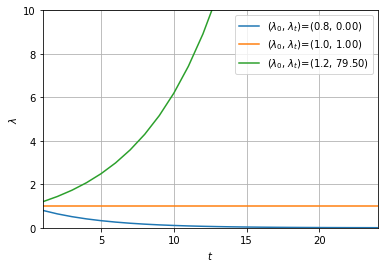

In [8]:
import numpy as np; import matplotlib.pyplot as plt
t = np.arange(1,25); l = np.array([0.8**t,1**t,1.2**t])
l_0 = ['($\lambda_0$, $\lambda_t$)=({}, {:.2f})'.format(x[0],x[-1]) for x in l]
plt.legend(iter(plt.plot(t,l.T)),l_0); 
plt.xlim([1,24]); plt.ylim([0,10]); plt.grid(); plt.xlabel('$t$'); plt.ylabel('$\lambda$'); plt.show();

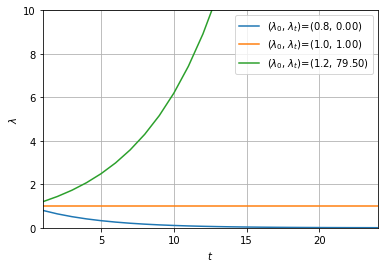</img>

Jo pelkästään muutamalla aika-askeleella ominaisarvot lähtevät karkuteille. Kun aika-askeleen käsittää sekvenssin alkioksi, ei esimerkiksi lauseen pituisen merkkijonon kohdalla ole juuri muita kuin räjähtäneitä tai lähes nolla-arvoisia parametreja jäljellä. 

Vaikka gradientit olisivatkin vakaita eikä edellä esitettyä ongelmaa syntyisi, painottuvat viimeaikaiset havainnot kuitenkin huomattavasti menneitä enemmän, jolloin menneiden havaintojen vaikutus kulloinkin laskettavaan hetkeen vaimenee. Tämä on ennenkaikkea toistavien verkkojen selkeä kompastuskivi. Tämä ei tarkoita, etteikö vakaiden painojen tapauksessa menneiden havaintojen vaikutuksia olisi mahdollista oppia, mutta että niiden opettelu vie kauan.

### 10.8 Echo State Networks

Parametreista toistava yhteydet $h$:sta takaisin itseensä ja syötteestä $x$ piilokerrokseen $h$ ovat vaikeiten opittavia. Eräs ratkaisu tämän helpottamiseksi on säätää rekursioon osallistuvat parametrit oppimista suosiviksi ja kouluttaa vain ulostulopainot. Tällaisia verkkoja (*echo* ja *liquid state networks*) nimitetään kootusti varantolaskennaksi (*reservoir computing*), sillä piilokerros muodostaa ajallisten piirteiden varannon, joka voi tavoittaa jotain menneistä syötteistä.

Tässä kohden kirja nimittää verkkoa rekursiiviseksi, mutta ei ainakaan ilmaise, että kyseessä on nimenomaisesti toistavasta verkosta eroava puumaisen laskentagraafin omaava rekursiivinen verkko. Oletus siis on, että rekursiivisesta verkosta puhuttaessa kuitenkin tarkoitetaan toistavaa verkkoa.

Kun aika-askelia käsittelevä verkko pysyy koulutuksen ajan täysin muuttumattomana, tapahtuu oppiminen tällöin ulostulokerroksessa. Silloin oppimisessa voidaan hyödyntää kaikkia perinteisen myötäkytketyn verkon koulutusmenetelmiä. Ongelmallisinta tällaisessa verkossa on kuitenkin aloitus. Eli miten siis alustaa toistavan verkon $x  \to h$ ja $h \to h$ parametrit, jotta ne kykenevät kuvaamaan syötteen aikaulottuvuuden piirteitä mahdollisimman rikkaasti?

Vastauksena on vakauden veitsen terälle alustaminen pitäen mielessä gradienttien häviämisen ja räjähtämisen mahdollisuuden tuomat rajoitteet. Siksi alunperin ajatuksena olikin alustaa parametrit riittävän lähelle arvoa 1. Kirjan esimerkki $J$:n ominaisarvovektoreista suhteessa gradientteihin $g$ on kuitenkin ensinnäkin hämmentävä ($g$ = parametrien osaderivaatat = $J$, eikö?). 

Mikäli tekstissä $J$:n tilalla olisi muualla käytetty $W$, eli parametrien joukko, muuttuisi teksti paljon ymmärrettävämmäksi. Tällöin ajatus gradienttien ajan läpi takaisinpropagoinnista kuulostaisi järkevältä, kun niiden arvo olisi $n$ askeleen jälkeen $W^ng$. Samoin ajatus parametrien alustamisesta siten, että niiden ominaisarvojen vaihteluväliä tai kirjoa (*spectral radius*) rajoitetaan, kuulostaa myös näin järkevämmältä.

Mitä Jacobian-matriisin kirjon laajuudella (*spectral radius*) sitten tarkoitetaankin suhteessa mallin parametrien eli painojen alustamiseen, jää se silti valitettavasti itselleni epäselväksi yllä olevan hämmenyksen vuoksi. Joka tapauksessa näiden verkkojen tavoite on alustaa $x  \to h$ ja $h \to h$ parametrit siten, että niiden omainaiarvojen vaihteluväliä rajoitetaan.

Tätä parametrien alustustekniikkaa voidaan käyttää myös syvempien toistavien verkkojen parametrien alustustekniikkana. Sen on huomattu helpottavan pidempijaksoisten ajallisten riippuvuuksien oppimista.

### 10.9 Leaky Units and Other Strategies for Multiple Time Scales

Pidempijaksoisten ajallisten riippuvuuksien mallintamisen ongelmaa voidaan lähestyä myös muillakin tavoin, kuin vain parametreja säätämällä. Eräs tapa on käyttää verkkoja, jotka oppivat asioita eri ajan skaaloissa - jotkut yksityiskohtaisemmassa, jotkut ylimalkaisemmassa skaalassa. Näin ajallisten piirteiden oppiminen ja välittäminen eteenpäin on tehokkaampaa. Keinoja tämän saavuttamiseen ovat mm. yli hyppäävät yhteydet (*skip connections*) ja ajallisesti vuotavat yksiköt (*leaky units*).

#### Adding Skip Connections through Time

Ajallisesti vaiheiden yli hyppäävät yhteydet auttavat karkeampien ajallisten piirteiden oppimisessa. Ajatus on perua viiveen käyttölle myötäkytkettyjen verkkojen kanssa. Tällöin peräkkäisten askelien $t \to t+1$ sijasta askelia voidaankin tehdä suuremmin harppauksin $t \to t+n$. Näin sekvenssin perättäisten askelten vaikutus gradienttien eksponentiaaliseen muuttumiseen hidastuu ja malli voi oppia vieläkin pidempijaksoisempia riippuvuuksia. Harppaus tehdään lisäämällä viivettä mallintavilla lisäyhteyksillä.

#### Leaky Units and a Spectrum of Different Time Scales

Toinen lähestymistapa on vuotavien yksikköjen käyttö. Käytännössä tällä tarkoitetaan lähes samaa asiaa kuin momentilla gradientin laskennassa. Tällöin piilokerrokseen syötetään aika-askeleesta toiseen siirtyessä myös edellisten aika-askelten arvojen juokseva keskiarvo $\mu_z$. Tätä keskiarvoa painoitetaan momentin tavoin ja se toteutetaan lineaarisilla $h \to h$ yhteyksillä.

Mikäli piilokerroksen ulostuloa merkitään muuttujalla $z$, saa piilokerros syötteekseen tällöin $\alpha \mu_z+(1-\alpha)z$. Juokseva keskiarvo kykenee tallettamaan paljon pysyvämmin menneitä arvoja, jolloin sen huomiointitasoa $\alpha$ säätelemällä voidaan verkko saada oppimaan pidempijaksoisia ajallisia riippuvuuksia.

#### Removing Connections

Viimeinen esitellyistä ajan skaalaan keskittyvistä ajallisten riippuvuuksien parantamisen menetelmistä on yli hyppäysten sijasta aika askelten raaka harvennus poistamalla. Aika-askelten harvennus voidaan toteuttaa viivästetyillä $h \to h$ yhteyksillä tai sitten hajautetusti ajastetuilla parametrien päivityksillä, jossa vain osa parametreista päivitetään yhden koulutusiteraation aikana.

### 10.10 The Long Short-Term Memory and Other Gated RNNs

Kirjan kirjoitushetkellä kaikista tehokkaimmat sekvenssejä käsittelevät syvät mallit tunnetaan portitettuina toistavina verkkoina (*gated RNNs*). Näitä ovat mm. pitkään välimuistiin (*long short-term memory, LSTM*) ja portein varustelluihin toistaviin yksikköihin (*gated recurrent unit*) perustuvat verkot. Edellisen aliluvun mennyttä tietoa kerääviin menetelmiin verrattuna nämä verkot voivat myös unohtaa menneitä tietoja tarvittaessa oppimalla, milloin jokin tieto on unohtamisen ja korvaamisen arvoinen.

#### LSTM

LSTM pohjaa ennen kaikkea jo esitellyihin ajatuksiin $h \to h$ yhteyksien lisäämisestä. Kiinteän yhteyden sijaan tätä lisäyhteyttä säädellään kuitenkin omalla opetettavalla piiloyksiköllä. Näin aika-skaalojen oppimisesta tulee dynaamista tiukkaan asettujen askelvälien tai painotusten sijasta. Vaikka koko muu verkko olisi täysin muuttumaton, se kykenee silti tuottamaan vaihteleviin ajanjaksoihin sopivia piirteitä syötteestä riippuen.

LSTM-verkot ovat osoittautuneet erityisen kykeneviksi oppimaan pitkäjaksoisia ajallisia riippuvuuksia ja helpommin, kuin perinteiset toistavat verkot. Näiden verkkojen toimintalogiikkaa on myös koitettu avata monissa eri paikoissa. Tässä pari hyvää linkkiä:

- [Christopher Olah: Understanding LSTM Networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)
- [Shi Yan: Understanding LSTM and its diagrams](https://medium.com/mlreview/understanding-lstm-and-its-diagrams-37e2f46f1714)

Kirjan kuvan sijasta tässä kohdin käytän hyväksi Shi Yanin todella hyviä kuvia.

Verkon toiminta perustuu portteihin. Tämä tekee LSTM-verkon piilokerroksesta merkittävästi erilaisemman kuin tähän asti totutut verkot, sillä se alkaa muistuttaa tilakonetta. Katsotaan ensin kokonaiskuvaa LSTM-verkon piilokerroksesta, minkä jälken edetään portti ja toiminto kerrallaan. 

<img src="https://cdn-images-1.medium.com/max/800/1*laH0_xXEkFE0lKJu54gkFQ.png">

Kaikkia portteja ohjataan omilla opittavilla parametreillaan. Kaikki verkon syötteistä, niin muisti, tilan ulostulo ja syöte voivat olla sekä yksittäisarvoja että vektoreita.

Ensimmäinen porteista on **unohdusportti** (*forget gate*).

<img src="https://cdn-images-1.medium.com/max/800/1*9ZgZxRSVAvJEsaoWtz69yg.png">

Sen tehtävänä on säädellä edellisen aika-askeleen muistin merkitsevyyttä eli sitä, kuinka paljon sitä unohdetaan. Edellisen tilan muisti $C_{t-1}$ tulee porttiin yhdessä edellisen tilan ulostulon $h_{t-1}$ ja uuden syötteen $x_t$ kanssa, minkä jälkeen $\sigma$-porttia avataan näiden yhteisvaikutuksen mukaisesti. Edellisen tilan muistia skaalataan portin eli $\sigma$-funktion tuloksen mukaan, jolloin tapahtuu unohtaminen.

Seuraavaksi on vuorossa **muistiportti** (*memory gate*) tai kuten kirja sen ilmaisee, ulkoisen syötteen portti (*external input gate*).

<img src="https://cdn-images-1.medium.com/max/800/1*lNDzNHVxLSKJEpCsP4KD4w.png">

Tässä kohden muodostetaan uusi muokattu muisti edellisen tilan ulostulosta $h_{t-1}$ ja syötteestä $x_t$ ajettuna blogin esimerkin tapauksessa $\tanh$-funktion läpi (se voisi yhtä hyvin olla myös $\sigma$). Kuten tuotua muistia, myös muokattua muistia skaalataan omalla $\sigma$-portillaan. Kummallekin osalle, portille ja muokatun muistin muuntamiselle, on omat opittavat parametrinsa.

Kahden edeltävän vaiheen jälkeen muokataan muistoa porttien avautumisen mukaisesti ja tuotetaan uusi seuraavaan aika-askeleesen vietävä muokattu muisti.

<img src="https://cdn-images-1.medium.com/max/800/1*eXmq2ZW1O0k5VSm-BUJ2Mg.png">

Viimeisenä on vuorossa **ulostuloportti** (*output gate*).

<img src="https://cdn-images-1.medium.com/max/800/1*mOhp-z4KM0Qm6Y0RY7YgMQ.png">

Tässä vaiheessa verkosta annetaan ulostulona muisti skaalattuna jälleen omalla $\sigma$-portilla. Portin säätelysyötteet ovat jälleen edellisen tilan ulostulo, syöte ja nyt muokattu muisti. Ulostulo voidaan siis myös kokonaan vaimentaa.

#### Other Gated RNNs

Koska LSTM-yksiköissä on todella monta erikseen opetettavaa porttia, on samaan toimintalogiikkaan pohjaavia kevyempiäkin variaatioita olemassa. Yksi näistä portitettu toistava yksikkö (*gated recurrent unit*), jossa on vain yksi sekä unohtamista että uuden muistin muodostamista säätelevä portti. Kyseinen yksikkö kykenee ottamaan ja unohtamaan myös vain osia syötteistään. Samoin tämä yksi portti säätelee myös ulostuloa LSTM-verkon tapaan.

Tämän lisäksi on monia muitakin variaatioita.

### 10.11 Optimization for Long-Term Dependencies

Toistavien ja LSTM-verkkojen optimointi seuraa nykyisin aiemmissa luvuissa esiteltyä ajatusta: On parempi suunnitella helpommin optimoitava kuin tehokkaampi malli. Toistavien verkkojen kanssa on tutkittu muun muassa toisen asteen optimointimenetelmien hyödyntämistä, mutta käyttämällä stokastista jyrkimmän laskun menetelmää Nesterovin momentilla ollaan päästy lähes laskennallisesti monin verroin haastavampien toisen asteen menetelmien tarkkuutta.

#### Clipping Gradients

Etenkin räjähtävien gradienttien kanssa optimointi muodostuu hankalaksi erityisesti parametrien muodostaman moniulotteisen pinnan jyrkännekohdissa. Mekaanisesti rajoittamalla gradienttien maksimikokoa eli gradientteja leikkaamalla (*clip*) voidaan välttää tilanteita, joissa ylisuuret gradientit vaikeuttavat optimointia. Menetelmä on esitelty jo luvussa 8.

Gradienttien leikkaamiseen on eri tapoja. Ensinnäkin gradientit voidaan leikata parametrikohtaisesti ennen juuri ennen koulutusiteraation parametrien päivitystä. Toinen vaihtoehdoista on leikata parametrien gradienttien normia ennen päivitystä. Tällöin määritellään jokin taso $v$, jonka ylittäessä gradientit $g$ leikataan kaavan

$$ g \leftarrow \frac{gv}{\|g\|} $$

mukaisesti. Kokeellinen tutkimus on osoittanut, että kummatkin auttavat gradientin päivittämisessä oikeaan suuntaan.

Gradienttien leikkaus lisää gradientteihin heuristisen vääristymän (*bias*), kun SGD on pyrkii perinteisesti etsimään vääristymättömiä gradientteja.

#### Regularizing to Encourage Information Flow

Häviävien gradienttien optimointiin ei gradienttien leikkaus kuitenkaan auta. Erityisesti tähän ongelmaan on kehitetty regularisointimenetelmä, joka pyrkii säilyttämään gradienttivektorin suuruuden virheen laskusta alkaen. Tällöin gradienttien leikkausta on kuitenkin pakosta käytettävä, sillä muutoin ne räjähtävät nopeasti. Näin malli kykenee tavoittamaan laajemman kirjon aikaan liittyvistä piirteistä.

Käytännössä tätä parempi vaihtoehto on kuitenkin LSTM-verkon käyttö, joka on osoittautunut sekä helpommin optimoitavaksi että paremmin suoriutuvaksi esimerkiksi kieleen liittyvien sekvenssiongelmien kanssa.

### 10.12 Explicit Memory

Neuroverkot ovat erittäin hyviä silloin, kun syötteitä muunnetaan suoraviivaisesti ulostuloiksi. Muuntaminen tapahtuu tällöin suoraviivaisesti opittujen lainalaisuuskien perusteella. Mikäli kuitenkin jonkin asian ymmärtäminen edellyttää asioiden muistamista, ovat neuroverkot ongelmissa. Niiltä puuttuu ihmiselle ominainen työmuisti, johon talletetaan tietoja myöhempien asioiden oikean ymmärtämisen takaamiseksi.

Tätä varten on kehitetty muistiverkkoja (*memory networks*) ja neuroverkkoihin pohjaavia Turingin koneita (*neural Turing machine, NMT*), joilla on LSTM-verkkojen muistin tapaan erillisiä muistisoluja (*memory cell*). Näihin muistisoluihin voidaan tallettaa ja niistä voidaan lukea tietoa koulutettavasti eli ilman ulkoista ohjausta. Kulloinkin käytettävää solua ja sille tehtävää operaatiota määrää verkon ulostulo, sen tila.

NMT-verkot kirjoittavat ja lukevat muistejaan samanaikaisesti intuition tasolla hieman samaan tapaan, kuin LSTM-verkot muokkaavat muistiaan. Päivittämis- ja lukuoperaatioita säädellään verkon sisäisillä ja opittavilla kertoimilla. Laskennan helpottamiseksi muistiin talletetaan vektoreita skalaarien sijasta. Näitä vektoreita noudetaan sisällön mukaan (*content-based addressing*).

Muistin käyttäminen auttaa ennen kaikkea vieläkin pidempien jaksollisten riippuvuuksien oppimisessa. Se, mitä muistia kulloinkin päätetään käyttää tai päivittää, määräytyy huomiomekanismia (*attention mechanism*) muistuttavaan tapaan. Mekanismin yleiperiaatteena on, että verkko kykenee vaihtamaan keskittymiskohdettaan koulutuksen aikana. Tätä käsitellään myöhemmissä luvuissa.